# Define the agents

In [1]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy.special import digamma

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



In [2]:


def ce(c,m):
    eta=1+c*m**2
   
    return 1/(eta/m+2*c*m*(math.log(m) + digamma(eta) - math.log(eta))),m/eta

In [3]:
# Import functions in the function file

%run trade_functions.ipynb


## define encounter matrix

In [4]:
economy_size=100

In [5]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Economy 

In [6]:
m_value=0.2

In [7]:
m_value2=0.3

In [8]:
# Define a
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size)]
agent_a['parameter']=[[3,3,3,4,economy_size] for _ in range(economy_size)]
agent_a['money']=[m_value for _ in range(economy_size)]
agent_a['gooda']=[m_value for _ in range(economy_size)]
agent_a['goodb']=[m_value for _ in range(economy_size)]

# Define b
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size)]
agent_b['parameter']=[[3,3,3,4,economy_size] for _ in range(economy_size)]
agent_b['money']=[m_value2 for _ in range(economy_size)]
agent_b['gooda']=[m_value2 for _ in range(economy_size)]
agent_b['goodb']=[m_value2 for _ in range(economy_size)]
# Define C
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2,4,economy_size] for _ in range(economy_size)]
agent_c['money']=[m_value2 for _ in range(economy_size)]
agent_c['gooda']=[m_value2 for _ in range(economy_size)]
agent_c['goodb']=[m_value2 for _ in range(economy_size)]
 
agent_c['constant']=[1 for _ in range(economy_size)]


In [9]:
## Theoretical Value

In [10]:
t1,t2=ce(4,m_value+0.05)
print(ce(4,m_value))

(0.40951679564175225, 0.17241379310344826)


In [11]:
t1,t2=ce(4,m_value2)
print(ce(4,m_value2))

(1.5194539092426396, 0.22058823529411767)


## trade function

In [12]:
def tester(agent1,agent2,gm1,gm2,length,size,f1,f2):
  
  
  mla=[gm1[2]]*economy_size
  gala=[gm1[0]]*economy_size
  gbla=[gm1[1]]*economy_size
  
  parametera=agent2['parameter'].copy()
    
  mlb=[gm2[2]]*economy_size
  galb=[gm2[0]]*economy_size
  gblb=[gm2[1]]*economy_size
    
  mlc=agent1['money'].copy()
  galc=agent1['gooda'].copy()
  gblc=agent1['goodb'].copy()
    
  
    
  
  parameterb=agent1['parameter'].copy()
  parameterc=agent1['parameter'].copy()
 
 
 

  

  ga2_history=[]
  gb2_history=[]
  m2_history=[] 


  for i in range(length[0]):
        
    
        gala,gbla,mla=bintra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f2,f2)
        galbc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
        if i%1==0:
        # test v1,v2 and beta
         gala,gbla,mla,galc,gblc,mlc=btest_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,1,[0,0,1],f1,f2)
      
        #gala,gbla,mla,galb,gblb,mlb=binter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,0.1,[0,0,1],f1,f2)
       
        
        ga2_history.append(sum(mla))
        gb2_history.append(sum(mlb))
        m2_history.append(sum(mlc))
      
    

    
    
  
    

  
        

  return ga2_history,gb2_history,m2_history

In [13]:
def plot_beconomy(ma,mb,mc):
    Tb=[x/(2*economy_size) for x in mb]
    Ta=[x/(2*economy_size) for x in mc]
    mean_m=np.mean(ma[-20000:])/economy_size
    Tbt,Tk=ce(4,mean_m)
    Tel = [Tbt] * len(ma)
    Tkl=[Tk] * len(ma)
    # Create a range of indices for the x-axis
    
    
    len_list=len(ma)+1
    numbers = list(range(1, len_list))
      
    time_scale=economy_size**2-economy_size
    time_index = [num / time_scale for num in numbers]
    # Plot both lists on the same graph
    #plt.plot(time_index, Tgb, label='CD economy', color='green')
    plt.plot(time_index, Tel, label='Theoretical Temperature for  Bouchaud Economy', color='orange')
    plt.plot(time_index, Ta, label='Tested Temperature ', color='blue')
    plt.plot(time_index, Tkl, label='Theoretical Temperature for CD Economy ', color='purple')
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend(loc='center right', bbox_to_anchor=(1, 0.4))
    
    # Show the plot
    plt.show()

In [14]:
gm1=[0.2,0.2,0.2]
gm2=[0.2,0.2,0.2]
ma1,mb1,mc1=tester(agent_c,agent_a,gm1,gm2,[100000],1,utility_func_b,utility_func_cd)

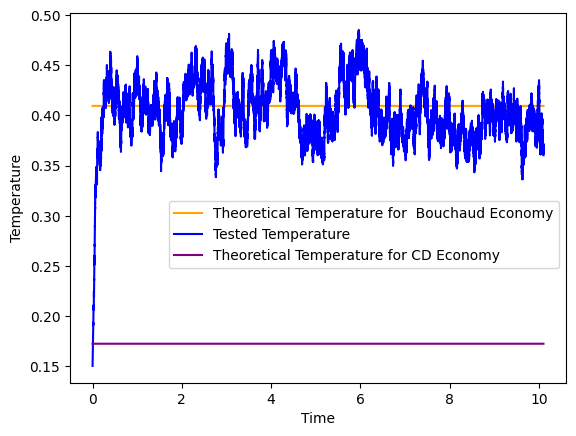

In [15]:
plot_beconomy(ma1,mb1,mc1)

In [33]:
gm1=[0.3,0.3,0.3]
gm2=[0.3,0.3,0.3]
ma2,mb2,mc2=tester(agent_c,agent_a,gm1,gm2,[200000],1,utility_func_b,utility_func_cd)


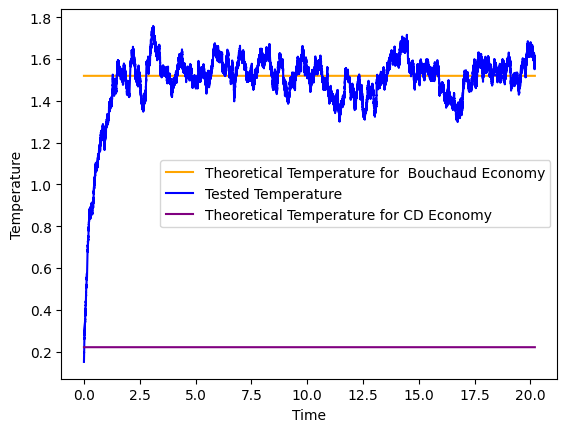

In [34]:
plot_beconomy(ma2,mb2,mc2)

In [43]:
gm1=[0.35,0.35,0.35]
gm2=[0.35,0.35,0.35]
ma3,mb3,mc3=tester(agent_c,agent_a,gm1,gm2,[400000],1,utility_func_b,utility_func_cd)


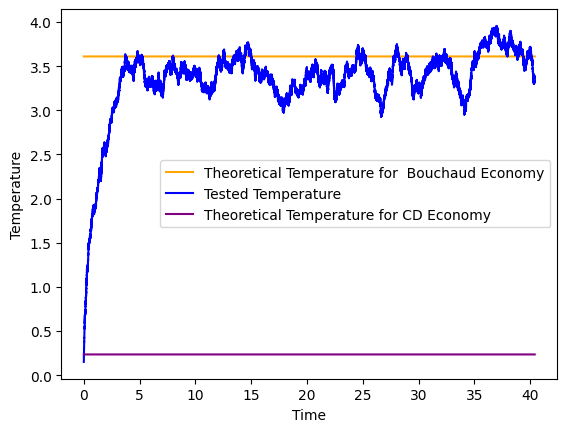

In [44]:
plot_beconomy(ma3,mb3,mc3)

In [14]:
gm1=[0.4,0.4,0.4]
gm2=[0.4,0.4,0.4]
ma4,mb4,mc4=tester(agent_c,agent_a,gm1,gm2,[2000000],1,utility_func_b,utility_func_cd)


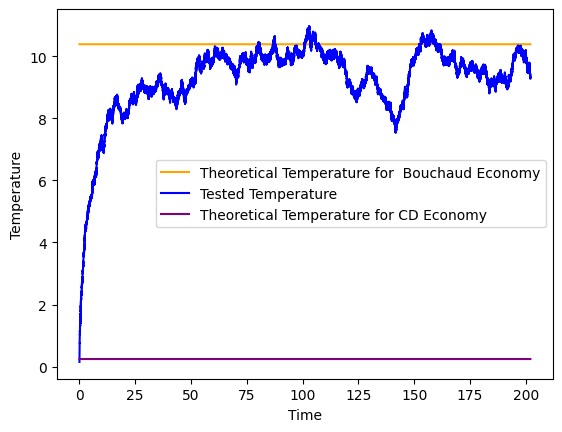

In [15]:
plot_beconomy(ma4,mb4,mc4)

## Inter Trade

In [17]:
def inter_b(agent1,agent2,gm1,gm2,length,size,f1,f2):
  
  
  mla=[gm1[2]]*economy_size
  gala=[gm1[0]]*economy_size
  gbla=[gm1[1]]*economy_size
  
  parametera=agent2['parameter'].copy()
    
  mlb=[gm2[2]]*economy_size
  galb=[gm2[0]]*economy_size
  gblb=[gm2[1]]*economy_size
    
  mlc=agent1['money'].copy()
  galc=agent1['gooda'].copy()
  gblc=agent1['goodb'].copy()
    
  mld=agent1['money'].copy()
  gald=agent1['gooda'].copy()
  gbld=agent1['goodb'].copy()
    
  
  parameterb=agent2['parameter'].copy()
  parameterc=agent1['parameter'].copy()
  parameterd=agent1['parameter'].copy()
 
 

  

  ga2_history=[]
  gb2_history=[]
  m2_history=[] 
  m3_history=[]
  for i in range(length[0]):
    

    gala,gbla,mla=bintra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
    
  
    
    galb,gblb,mlb=bintra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f1)
    
    galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
    gald,gbld,mld=intra_trade(gald,gbld,mld,parameterd,matrix,1,f2,f2)
    # test v1,v2 and beta
    gala,gbla,mla,galc,gblc,mlc=btest_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
    galb,gblb,mlb,gald,gbld,mld=btest_trade(galb,gblb,mlb,gald,gbld,mld,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
    #gala,gbla,mla,galb,gblb,mlb=binter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,0.1,[0,0,1],f1,f2)
  for i in range(length[1]):
    

    gala,gbla,mla=bintra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
    
  
    
    galb,gblb,mlb=bintra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f1)
    
    galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
    gald,gbld,mld=intra_trade(gald,gbld,mld,parameterd,matrix,1,f2,f2)
    # test v1,v2 and beta
    gala,gbla,mla,galc,gblc,mlc=btest_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
    galb,gblb,mlb,gald,gbld,mld=btest_trade(galb,gblb,mlb,gald,gbld,mld,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
    #gala,gbla,mla,galb,gblb,mlb=binter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,0.1,[0,0,1],f1,f2)
    ga2_history.append(sum(mla))
    gb2_history.append(sum(mlb))
    m2_history.append(sum(mlc))
    m3_history.append(sum(mld))
        
   

  for i in range(length[2]):
        
    
        gala,gbla,mla=bintra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=bintra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f1)
      
        galbc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
        gald,gbld,mld=intra_trade(gald,gbld,mld,parameterd,matrix,1,f2,f2)
       
        gala,gbla,mla,galb,gblb,mlb=binter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[0,0,1],f1,f1)
      
        gala,gbla,mla,galc,gblc,mlc=btest_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
        galb,gblb,mlb,gald,gbld,mld=btest_trade(galb,gblb,mlb,gald,gbld,mld,parametera,parameterd,matrix,size,[0,0,1],f1,f2)
       
        
        ga2_history.append(sum(mla))
        gb2_history.append(sum(mlb))
        m2_history.append(sum(mlc))
        m3_history.append(sum(mld))
    

    
    
  
    

  
        

  return ga2_history,gb2_history,m2_history,m3_history

In [21]:
gm1=[m_value,m_value,m_value]
gm2=[m_value2,m_value2,m_value2]
ma,mb,mc,md=inter_b(agent_c,agent_a,gm1,gm2,[10000,20000,50000],1,utility_func_b,utility_func_cd)

In [22]:
Ta=[x/(2*economy_size) for x in mc]
Tb=[x/(2*economy_size) for x in md]
mean_m1=np.mean(ma[-20000:])/economy_size
mean_m2=np.mean(mb[-20000:])/economy_size

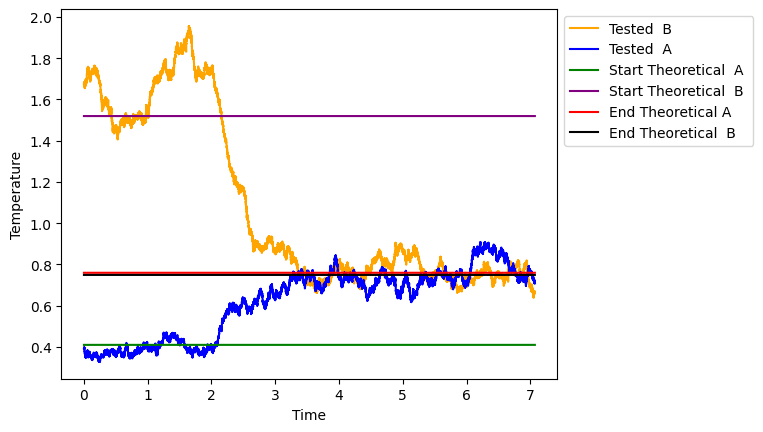

In [31]:
Tbta,Tk=ce(4,m_value)
Tbtb,Tk=ce(4,m_value2)

Tbtc,Tk=ce(4,mean_m1)
Tbtd,Tk=ce(4,mean_m2)


Tela = [Tbta] * len(ma)
Telb = [Tbtb] * len(ma)
Telc = [Tbtc] * len(ma)
Teld = [Tbtd] * len(ma)
# Create a range of indices for the x-axis


len_list=len(ma)+1
numbers = list(range(1, len_list))
  
time_scale=economy_size**2-economy_size
time_index = [num / time_scale for num in numbers]
# Plot both lists on the same graph
plt.plot(time_index, Tb, label='Tested  B', color='orange')
plt.plot(time_index, Ta, label='Tested  A ', color='blue')

plt.plot(time_index, Tela, label='Start Theoretical  A', color='green')

plt.plot(time_index, Telb, label='Start Theoretical  B ', color='purple')
plt.plot(time_index, Telc, label='End Theoretical A ', color='red')
plt.plot(time_index, Teld, label='End Theoretical  B ', color='black')


# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()